In [4]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [5]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### 匯入CIFAR10資料然後整理

In [6]:
# Load CIFAR 10
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

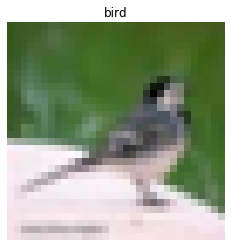

In [7]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

#### 創建CNN及FC層

In [8]:
#filter改用16 64 256
CNN_layers = [Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(256, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]
#神經元下修至128
FC_layers = [Dense(units=128, activation='relu'),
             Dense(units=10, activation='softmax')]

In [9]:
model_2 = Sequential(CNN_layers+FC_layers)
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 256)         147712    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

#### 組合模型並訓練

In [10]:
model_2.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['categorical_accuracy'])

In [11]:
#batch_size使用100，讓模型訓練3次
model_2.fit(X_train, y_train, 
          batch_size=100, 
          epochs=3,
          validation_data=(X_test, y_test)
          )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.8518 - categorical_accuracy: 0.2968 - val_loss: 1.6484 - val_categorical_accuracy: 0.3758
Epoch 2/3
50000/50000 [==============================] - 84s 2ms/sample - loss: 1.5930 - categorical_accuracy: 0.4109 - val_loss: 1.4611 - val_categorical_accuracy: 0.4653
Epoch 3/3
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.4334 - categorical_accuracy: 0.4767 - val_loss: 1.3792 - val_categorical_accuracy: 0.5000


#### 準確率

In [12]:
score_train = model_2.evaluate(X_train, y_train)
score_test = model_2.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 8s 805us/sample - loss: 1.3792 - categorical_accuracy: 0.5000 - loss:
Train Accuracy: 49.366000294685364
Test Accuracy: 50.0


#### 匯入CIFAR100的資料然後整理

In [13]:
# Load CIFAR 100
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

# Normalize the range of featurs
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

#### 創建CF100的FC層

In [22]:
FC_layers_CF100 = [Dense(units=128, activation='relu'),
                   Dense(units=64, activation='relu'),
                   Dense(units=100, activation='softmax')]

#### 將CF10的CNN層及CF100的FC層合併

In [23]:
model_CF100 = Sequential(CNN_layers+FC_layers_CF100)

#### Transfer learning 凍結CNN_layers

In [25]:
for layer in CNN_layers:
    layer.trainable = False

In [32]:
model_CF100.summary() #看一下我們的模型是否有成功凍結

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 256)         147712    
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [27]:
model_CF100.compile(loss='categorical_crossentropy', 
                    optimizer='adam',
                    metrics=['categorical_accuracy'])

#### 訓練

In [28]:
model_CF100.fit(U_train, v_train,
                batch_size=100, 
                epochs=3,
                validation_data=(U_test, v_test)
                )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 43s 858us/sample - loss: 4.1248 - categorical_accuracy: 0.0688 - val_loss: 3.8012 - val_categorical_accuracy: 0.1136
Epoch 2/3
50000/50000 [==============================] - 42s 836us/sample - loss: 3.6746 - categorical_accuracy: 0.1304 - val_loss: 3.5953 - val_categorical_accuracy: 0.1434
Epoch 3/3
50000/50000 [==============================] - 42s 830us/sample - loss: 3.5314 - categorical_accuracy: 0.1554 - val_loss: 3.5010 - val_categorical_accuracy: 0.1608


#### 看一下此模型的正確率，可以發現訓練效果很差！

In [52]:
score_train = model_CF100.evaluate(U_train, v_train)
score_test = model_CF100.evaluate(U_test, v_test)
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

10000/10000 [==============================] - 7s 703us/sample - loss: 3.5010 - categorical_accuracy: 0.1608
Train Accuracy: 16.478000581264496
Test Accuracy: 16.07999950647354
